<a href="https://colab.research.google.com/github/anantshahi/Anime_Recommendation_engine/blob/master/elon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Youtube URL: https://www.youtube.com/watch?v=ycPr5-27vSI

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anantshahi","key":"c4498484eec6c11ec3712cec94724acf"}'}

In [ ]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d christianlillelund/joe-rogan-experience-1169-elon-musk

  0% 0.00/59.1k [00:00<?, ?B/s]
100% 59.1k/59.1k [00:00<00:00, 56.5MB/s]


In [ ]:
!unzip elon.zip

Archive:  elon.zip
  inflating: joe-rogan-experience-1169-elon-musk.csv  


In [ ]:
data = pd.read_csv('/content/elon.csv')

In [ ]:
data.shape

(1831, 3)

In [ ]:
data.isna().sum()

Timestamp    0
Speaker      0
Text         0
dtype: int64

In [ ]:
data.isnull().sum()

Timestamp    0
Speaker      0
Text         0
dtype: int64

In [ ]:
data.head()

,Timestamp,Speaker,Text
0,[00:00:00],Joe Rogan,"Ah, ha, ha, ha. Four, three, two, one, boom. T..."
1,[00:00:09],Elon Musk,You're welcome.
2,[00:00:10],Joe Rogan,It's very good to meet you.
3,[00:00:11],Elon Musk,Nice to meet you too.
4,[00:00:12],Joe Rogan,And thanks for not lighting this place on fire.


In [ ]:
def lowerit(x):
  return x.lower()

In [ ]:
import re

def punctuations(x):
  return re.sub('[!@#$%^&*():;><]','',x)




In [ ]:
def digits(x):
  return re.sub('[0-9]','',x)

In [ ]:
def hyper(x):
  return str(x.replace('https://sonix.ai/',''))

In [ ]:
data['Text'] = data['Text'].apply(lambda x: lowerit(x))

In [ ]:
data['Text']

0       ah, ha, ha, ha. four, three, two, one, boom. t...
1                                         you're welcome.
2                             it's very good to meet you.
3                                   nice to meet you too.
4         and thanks for not lighting this place on fire.
                              ...                        
1826              i believe it's true too. so, thank you.
1827                                      you're welcome.
1828    all you assholes out there, be nice. be nice, ...
1829                                all right, thank you.
1830    good night, everybody. end of transcriptautoma...
Name: Text, Length: 1831, dtype: object

In [ ]:
data['Text'] = data['Text'].apply(lambda x: punctuations(x))

In [ ]:
data['Text'] = data['Text'].apply(lambda x: digits(x))

In [ ]:
data['Text'] = data['Text'].apply(lambda x: hyper(x))

In [ ]:
data['Text']

0       ah, ha, ha, ha. four, three, two, one, boom. t...
1                                         you're welcome.
2                             it's very good to meet you.
3                                   nice to meet you too.
4         and thanks for not lighting this place on fire.
                              ...                        
1826              i believe it's true too. so, thank you.
1827                                      you're welcome.
1828    all you assholes out there, be nice. be nice, ...
1829                                all right, thank you.
1830    good night, everybody. end of transcriptautoma...
Name: Text, Length: 1831, dtype: object

In [ ]:
type(df['Text'][0][0])

NameError: ignored

In [ ]:
def sentiments(x):
  mid_data = TextBlob(x)
  personal_ratio = float(mid_data.subjectivity)
  return personal_ratio

In [ ]:
def polar(x):
  mid_data = TextBlob(x)
  senti_ratio = float(mid_data.polarity)
  return senti_ratio

In [ ]:
polars = []
step = 0
for i in data['Text']:
  val = polar(i)
  polars.append(val)
  print(step)
  step+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
facts = []

step = 0
for i in data['Text']:
  val = sentiments(i)
  facts.append(val)
  print(step)
  step+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
len(facts)

1831

In [ ]:
len(polars)

1831

In [ ]:
max(facts)

1.0

In [ ]:
min(facts)

0.0

In [ ]:
max(polars)

1.0

In [ ]:
min(polars)

-1.0

In [ ]:
data['Sentiment_Polarity'] = polars

In [ ]:
data

,Timestamp,Speaker,Text,Sentiment_Polarity
0,[00:00:00],Joe Rogan,"ah, ha, ha, ha. four, three, two, one, boom. t...",0.200000
1,[00:00:09],Elon Musk,you're welcome.,0.800000
2,[00:00:10],Joe Rogan,it's very good to meet you.,0.910000
3,[00:00:11],Elon Musk,nice to meet you too.,0.600000
4,[00:00:12],Joe Rogan,and thanks for not lighting this place on fire.,0.200000
...,...,...,...,...
1826,[02:36:41],Joe Rogan,"i believe it's true too. so, thank you.",0.350000
1827,[02:36:43],Elon Musk,you're welcome.,0.800000
1828,[02:36:44],Joe Rogan,"all you assholes out there, be nice. be nice, ...",0.495238
1829,[02:36:50],Elon Musk,"all right, thank you.",0.285714


In [ ]:
data['Opinion'] = facts

In [ ]:
data

,Timestamp,Speaker,Text,Sentiment_Polarity,Opinion
0,[00:00:00],Joe Rogan,"ah, ha, ha, ha. four, three, two, one, boom. t...",0.200000,0.200000
1,[00:00:09],Elon Musk,you're welcome.,0.800000,0.900000
2,[00:00:10],Joe Rogan,it's very good to meet you.,0.910000,0.780000
3,[00:00:11],Elon Musk,nice to meet you too.,0.600000,1.000000
4,[00:00:12],Joe Rogan,and thanks for not lighting this place on fire.,0.200000,0.200000
...,...,...,...,...,...
1826,[02:36:41],Joe Rogan,"i believe it's true too. so, thank you.",0.350000,0.650000
1827,[02:36:43],Elon Musk,you're welcome.,0.800000,0.900000
1828,[02:36:44],Joe Rogan,"all you assholes out there, be nice. be nice, ...",0.495238,0.845238
1829,[02:36:50],Elon Musk,"all right, thank you.",0.285714,0.535714


In [ ]:

def sentimentLabels(x):
  vals ='I dunno'
  if x == 0.0:
    vals = 'Neutral Highlight'
    
  elif x>0.0 and x<=0.25:
    vals = 'Okayish Highlight'
    
  elif x>0.25 and x<=0.50:
    vals = 'Slightly Positive Highlight'
    
  elif x>0.50 and x<=0.75:
    vals = 'Very Positive Highlight'
    
  elif x>0.75 and x<=1.0:
    vals = 'Happy Highlights'
    
  elif x>0.0 and x<=-0.25:
    vals = 'Negatively Okayish Highlight'
    
  elif x>-0.25 and x<=-0.50:
    vals = 'Slightly Negative Highlight'
    
  elif x>-0.50 and x<=-0.75:
    vals = 'Very Negative Highlight'
    
  elif x>-0.75 and x<=-1.0:
    vals = 'Anguished and Sad Highlights'
    
  return vals


In [ ]:
sent_labels = []
count = 0
for i in polars:
  value = sentimentLabels(i)
  sent_labels.append(value)
  print(count)
  count+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
sent_labels

['Okayish Highlight',
 'Happy Highlights',
 'Happy Highlights',
 'Very Positive Highlight',
 'Okayish Highlight',
 'Slightly Positive Highlight',
 'Neutral Highlight',
 'I dunno',
 'Neutral Highlight',
 'I dunno',
 'Okayish Highlight',
 'Slightly Positive Highlight',
 'I dunno',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'I dunno',
 'Slightly Positive Highlight',
 'I dunno',
 'Slightly Positive Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Slightly Positive Highlight',
 'I dunno',
 'I dunno',
 'Neutral Highlight',
 'Okayish Highlight',
 'Very Positive Highlight',
 'Neutral Highlight',
 'Okayish Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Okayish Highlight',
 'Okayish Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'Neutral Highlight',
 'I dunno',
 'Okayish Highlight',
 'I dunn

In [ ]:
data

,Timestamp,Speaker,Text,Sentiment_Polarity,Opinion
0,[00:00:00],Joe Rogan,"ah, ha, ha, ha. four, three, two, one, boom. t...",0.200000,0.200000
1,[00:00:09],Elon Musk,you're welcome.,0.800000,0.900000
2,[00:00:10],Joe Rogan,it's very good to meet you.,0.910000,0.780000
3,[00:00:11],Elon Musk,nice to meet you too.,0.600000,1.000000
4,[00:00:12],Joe Rogan,and thanks for not lighting this place on fire.,0.200000,0.200000
...,...,...,...,...,...
1826,[02:36:41],Joe Rogan,"i believe it's true too. so, thank you.",0.350000,0.650000
1827,[02:36:43],Elon Musk,you're welcome.,0.800000,0.900000
1828,[02:36:44],Joe Rogan,"all you assholes out there, be nice. be nice, ...",0.495238,0.845238
1829,[02:36:50],Elon Musk,"all right, thank you.",0.285714,0.535714


In [ ]:
data['SentimentLabel'] = sent_labels

In [ ]:
data

,Timestamp,Speaker,Text,Sentiment_Polarity,Opinion,SentimentLabel
0,[00:00:00],Joe Rogan,"ah, ha, ha, ha. four, three, two, one, boom. t...",0.200000,0.200000,Okayish Highlight
1,[00:00:09],Elon Musk,you're welcome.,0.800000,0.900000,Happy Highlights
2,[00:00:10],Joe Rogan,it's very good to meet you.,0.910000,0.780000,Happy Highlights
3,[00:00:11],Elon Musk,nice to meet you too.,0.600000,1.000000,Very Positive Highlight
4,[00:00:12],Joe Rogan,and thanks for not lighting this place on fire.,0.200000,0.200000,Okayish Highlight
...,...,...,...,...,...,...
1826,[02:36:41],Joe Rogan,"i believe it's true too. so, thank you.",0.350000,0.650000,Slightly Positive Highlight
1827,[02:36:43],Elon Musk,you're welcome.,0.800000,0.900000,Happy Highlights
1828,[02:36:44],Joe Rogan,"all you assholes out there, be nice. be nice, ...",0.495238,0.845238,Slightly Positive Highlight
1829,[02:36:50],Elon Musk,"all right, thank you.",0.285714,0.535714,Slightly Positive Highlight


In [ ]:
def opinionLabel(x):
  op = 'I dunno'

  if x == 0:
    op = 'Facts'
  elif x>0 and x<=0.25:
    op = 'Factual and Slightly personal/public'
  elif x>0.25 and x<=0.50:
    op = 'Factual and personal/public'
  elif x>0.50 and x<=0.75:
    op = 'Less Factual and more personal/public'
  elif x>0.75 and x<=1.0:
    op = 'Personal/Public opinion'
  return op

In [ ]:
opinion_labels = []
steps = 0
for i in facts:
  ops = opinionLabel(i)
  opinion_labels.append(ops)
  print(steps)
  steps+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
data['OpinionLabel'] = opinion_labels

In [ ]:
data

,Timestamp,Speaker,Text,Sentiment_Polarity,Opinion,SentimentLabel,OpinionLabel
0,[00:00:00],Joe Rogan,"ah, ha, ha, ha. four, three, two, one, boom. t...",0.200000,0.200000,Okayish Highlight,Factual and Slightly personal/public
1,[00:00:09],Elon Musk,you're welcome.,0.800000,0.900000,Happy Highlights,Personal/Public opinion
2,[00:00:10],Joe Rogan,it's very good to meet you.,0.910000,0.780000,Happy Highlights,Personal/Public opinion
3,[00:00:11],Elon Musk,nice to meet you too.,0.600000,1.000000,Very Positive Highlight,Personal/Public opinion
4,[00:00:12],Joe Rogan,and thanks for not lighting this place on fire.,0.200000,0.200000,Okayish Highlight,Factual and Slightly personal/public
...,...,...,...,...,...,...,...
1826,[02:36:41],Joe Rogan,"i believe it's true too. so, thank you.",0.350000,0.650000,Slightly Positive Highlight,Less Factual and more personal/public
1827,[02:36:43],Elon Musk,you're welcome.,0.800000,0.900000,Happy Highlights,Personal/Public opinion
1828,[02:36:44],Joe Rogan,"all you assholes out there, be nice. be nice, ...",0.495238,0.845238,Slightly Positive Highlight,Personal/Public opinion
1829,[02:36:50],Elon Musk,"all right, thank you.",0.285714,0.535714,Slightly Positive Highlight,Less Factual and more personal/public


In [ ]:
data.to_csv('elonProcessed.csv')

#Visualization

In [ ]:
df = pd.read_csv('/content/elonProcessed.csv')

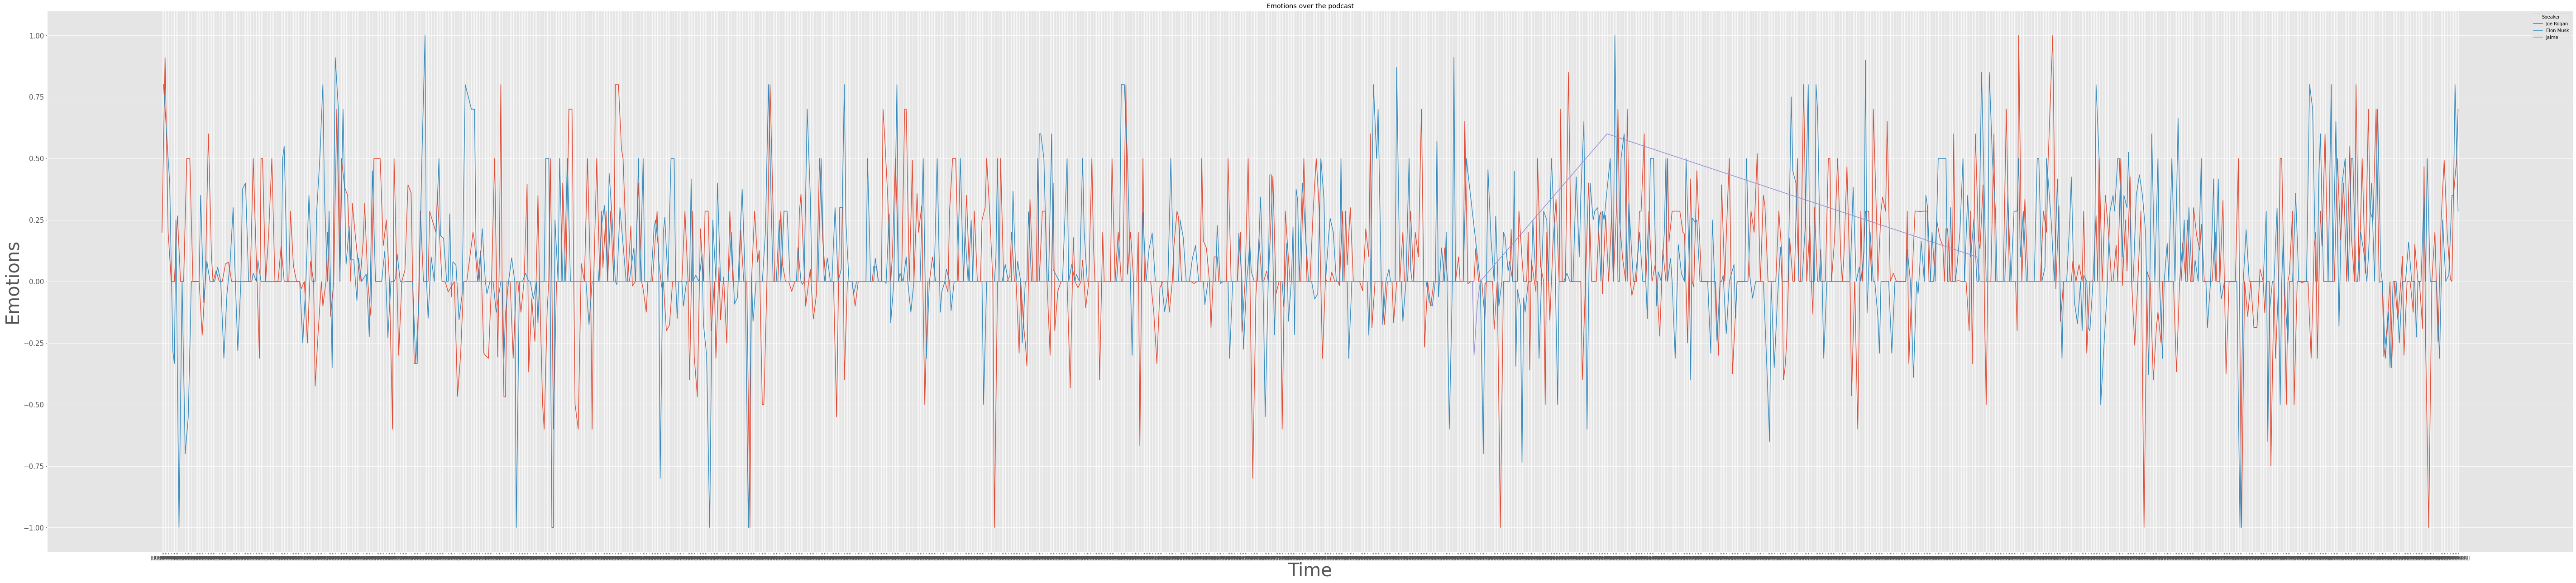

In [ ]:
plt.figure(figsize=(100,22))
plt.style.use('ggplot')
plt.title("Emotions over the podcast")

plt.ylabel("Emotions")
g = sns.lineplot(data=df, x="Timestamp", y="Sentiment_Polarity", hue = 'Speaker')
g.set_xlabel('Time',fontsize=40)
g.set_ylabel('Emotions',fontsize=40)
plt.yticks(fontsize=15)

plt.show()


In [ ]:
df

,Unnamed: 0,Timestamp,Speaker,Text,Sentiment_Polarity,Opinion,SentimentLabel,OpinionLabel
0,0,[00:00:00],Joe Rogan,"ah, ha, ha, ha. four, three, two, one, boom. t...",0.200000,0.200000,Okayish Highlight,Factual and Slightly personal/public
1,1,[00:00:09],Elon Musk,you're welcome.,0.800000,0.900000,Happy Highlights,Personal/Public opinion
2,2,[00:00:10],Joe Rogan,it's very good to meet you.,0.910000,0.780000,Happy Highlights,Personal/Public opinion
3,3,[00:00:11],Elon Musk,nice to meet you too.,0.600000,1.000000,Very Positive Highlight,Personal/Public opinion
4,4,[00:00:12],Joe Rogan,and thanks for not lighting this place on fire.,0.200000,0.200000,Okayish Highlight,Factual and Slightly personal/public
...,...,...,...,...,...,...,...,...
1826,1826,[02:36:41],Joe Rogan,"i believe it's true too. so, thank you.",0.350000,0.650000,Slightly Positive Highlight,Less Factual and more personal/public
1827,1827,[02:36:43],Elon Musk,you're welcome.,0.800000,0.900000,Happy Highlights,Personal/Public opinion
1828,1828,[02:36:44],Joe Rogan,"all you assholes out there, be nice. be nice, ...",0.495238,0.845238,Slightly Positive Highlight,Personal/Public opinion
1829,1829,[02:36:50],Elon Musk,"all right, thank you.",0.285714,0.535714,Slightly Positive Highlight,Less Factual and more personal/public


In [ ]:
df['SentimentLabel'].value_counts()

Neutral Highlight              870
Slightly Positive Highlight    308
I dunno                        294
Okayish Highlight              273
Very Positive Highlight         52
Happy Highlights                34
Name: SentimentLabel, dtype: int64

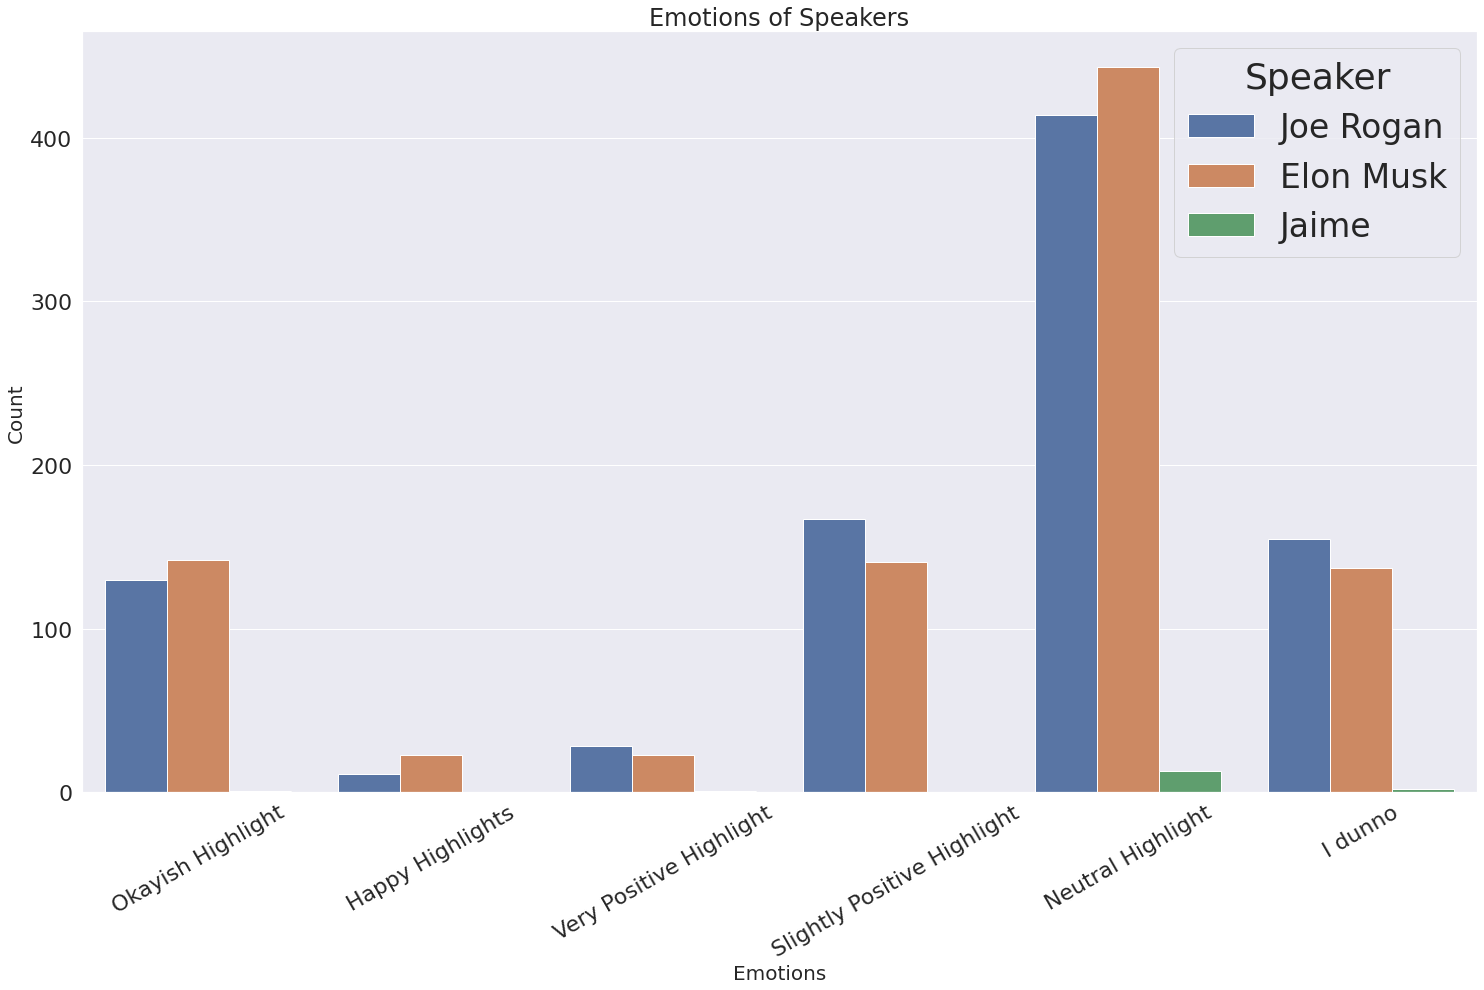

In [ ]:
plt.figure(figsize=(25,14))
plt.title("Emotions of Speakers")
sns.set(font_scale=3)
p = sns.countplot(x='SentimentLabel',data=df,hue='Speaker')
p.set_xlabel('Emotions', fontsize =20)
p.set_ylabel('Count', fontsize = 20)
plt.xticks(rotation=30)

plt.show()

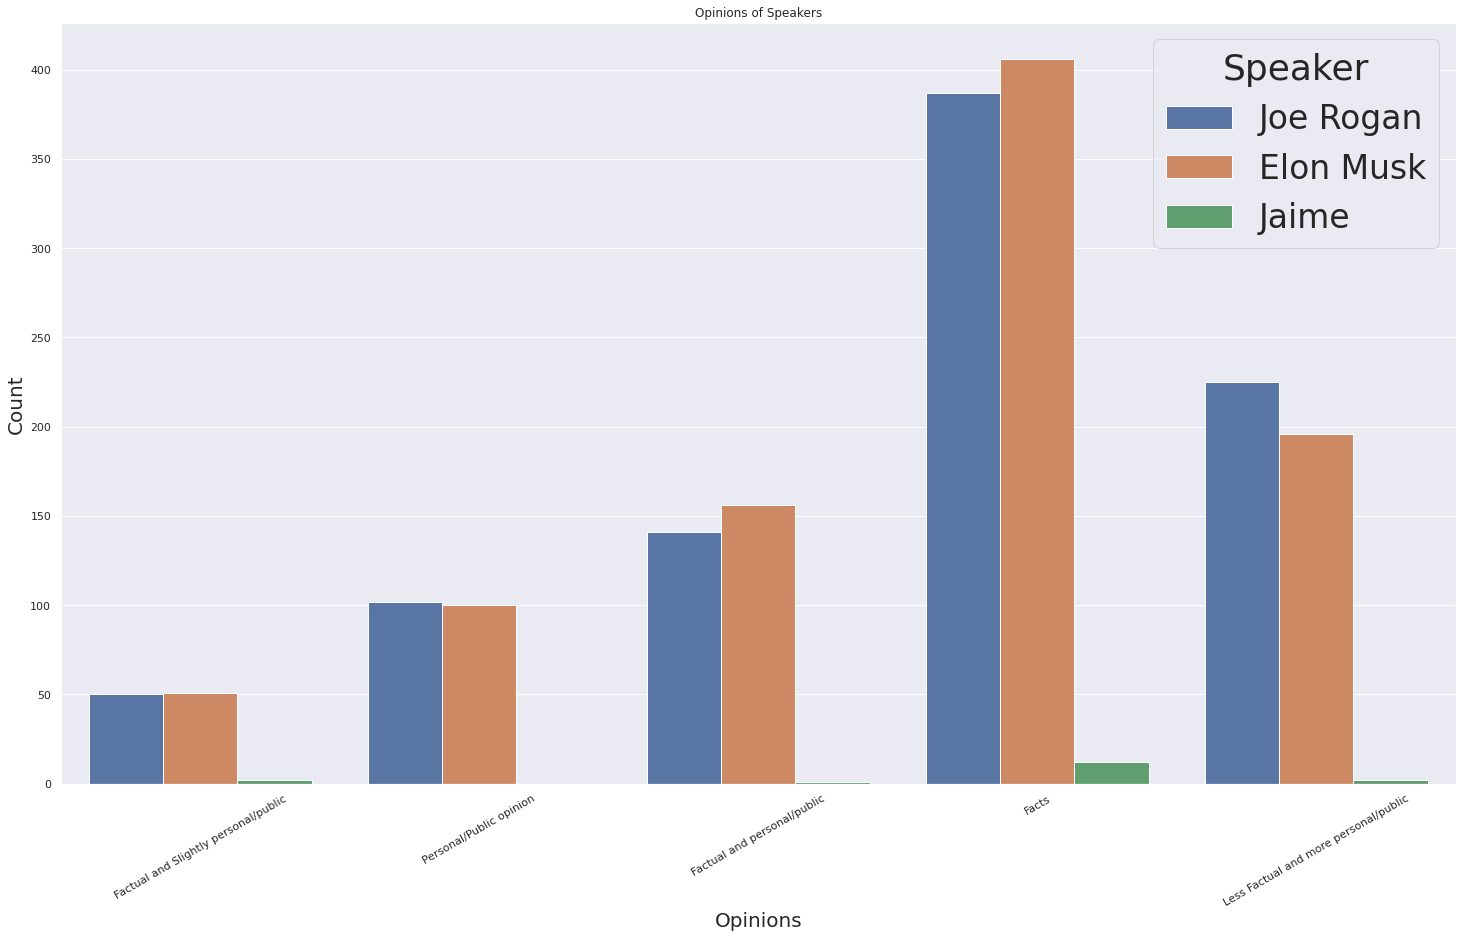

In [ ]:
plt.figure(figsize=(25,14))
plt.title("Opinions of Speakers")
sns.set(font_scale=3)
p = sns.countplot(x='OpinionLabel',data=df,hue='Speaker')
p.set_xlabel('Opinions', fontsize =20)
p.set_ylabel('Count', fontsize = 20)
plt.xticks(rotation=30)

plt.show()

In [ ]:
df

,Unnamed: 0,Timestamp,Speaker,Text,Sentiment_Polarity,Opinion,SentimentLabel,OpinionLabel
0,0,[00:00:00],Joe Rogan,"ah, ha, ha, ha. four, three, two, one, boom. t...",0.200000,0.200000,Okayish Highlight,Factual and Slightly personal/public
1,1,[00:00:09],Elon Musk,you're welcome.,0.800000,0.900000,Happy Highlights,Personal/Public opinion
2,2,[00:00:10],Joe Rogan,it's very good to meet you.,0.910000,0.780000,Happy Highlights,Personal/Public opinion
3,3,[00:00:11],Elon Musk,nice to meet you too.,0.600000,1.000000,Very Positive Highlight,Personal/Public opinion
4,4,[00:00:12],Joe Rogan,and thanks for not lighting this place on fire.,0.200000,0.200000,Okayish Highlight,Factual and Slightly personal/public
...,...,...,...,...,...,...,...,...
1826,1826,[02:36:41],Joe Rogan,"i believe it's true too. so, thank you.",0.350000,0.650000,Slightly Positive Highlight,Less Factual and more personal/public
1827,1827,[02:36:43],Elon Musk,you're welcome.,0.800000,0.900000,Happy Highlights,Personal/Public opinion
1828,1828,[02:36:44],Joe Rogan,"all you assholes out there, be nice. be nice, ...",0.495238,0.845238,Slightly Positive Highlight,Personal/Public opinion
1829,1829,[02:36:50],Elon Musk,"all right, thank you.",0.285714,0.535714,Slightly Positive Highlight,Less Factual and more personal/public


In [ ]:
happyHighlights = set(df.loc[df['SentimentLabel'] == 'Happy Highlights']['Timestamp'])

In [ ]:
happyHighlights

{'[00:00:09]',
 '[00:00:10]',
 '[00:12:12]',
 '[00:12:56]',
 '[00:24:23]',
 '[00:30:39]',
 '[00:34:24]',
 '[00:40:00]',
 '[00:40:40]',
 '[00:51:16]',
 '[00:51:19]',
 '[00:56:18]',
 '[00:59:18]',
 '[01:09:10]',
 '[01:09:13]',
 '[01:09:14]',
 '[01:30:34]',
 '[01:31:06]',
 '[01:35:35]',
 '[01:43:15]',
 '[01:44:46]',
 '[01:58:38]',
 '[01:58:48]',
 '[01:59:08]',
 '[02:00:55]',
 '[02:07:13]',
 '[02:08:10]',
 '[02:09:10]',
 '[02:10:49]',
 '[02:13:55]',
 '[02:29:05]',
 '[02:29:33]',
 '[02:30:50]',
 '[02:36:43]'}

In [ ]:
veryPositiveHighlights = set(df.loc[df['SentimentLabel'] == 'Very Positive Highlight']['Timestamp'])

In [ ]:
veryPositiveHighlights

{'[00:00:11]',
 '[00:04:02]',
 '[00:10:26]',
 '[00:12:58]',
 '[00:12:59]',
 '[00:13:02]',
 '[00:30:47]',
 '[00:30:52]',
 '[00:37:12]',
 '[00:37:16]',
 '[00:40:51]',
 '[00:54:15]',
 '[00:58:37]',
 '[00:58:39]',
 '[00:59:39]',
 '[00:59:42]',
 '[01:05:27]',
 '[01:05:28]',
 '[01:05:46]',
 '[01:30:17]',
 '[01:30:42]',
 '[01:33:27]',
 '[01:34:21]',
 '[01:36:00]',
 '[01:43:01]',
 '[01:43:33]',
 '[01:44:34]',
 '[01:44:48]',
 '[01:45:29]',
 '[01:45:42]',
 '[01:46:56]',
 '[01:56:14]',
 '[01:58:08]',
 '[01:59:09]',
 '[02:01:38]',
 '[02:02:09]',
 '[02:05:33]',
 '[02:06:43]',
 '[02:08:14]',
 '[02:08:39]',
 '[02:15:51]',
 '[02:16:52]',
 '[02:18:51]',
 '[02:29:08]',
 '[02:29:18]',
 '[02:29:28]',
 '[02:29:37]',
 '[02:30:28]',
 '[02:31:21]',
 '[02:31:46]',
 '[02:31:48]',
 '[02:36:50]'}

In [ ]:
factualTalks = set(df.loc[df['OpinionLabel'] == 'Facts']['Timestamp'])

In [ ]:
factualTalks

{'[00:00:16]',
 '[00:01:02]',
 '[00:02:22]',
 '[00:02:23]',
 '[00:02:24]',
 '[00:02:40]',
 '[00:02:43]',
 '[00:02:44]',
 '[00:02:49]',
 '[00:02:53]',
 '[00:02:54]',
 '[00:03:43]',
 '[00:04:06]',
 '[00:04:07]',
 '[00:04:08]',
 '[00:04:09]',
 '[00:04:59]',
 '[00:05:01]',
 '[00:05:04]',
 '[00:05:45]',
 '[00:06:46]',
 '[00:06:51]',
 '[00:06:54]',
 '[00:07:34]',
 '[00:07:41]',
 '[00:07:43]',
 '[00:07:51]',
 '[00:09:13]',
 '[00:09:17]',
 '[00:09:32]',
 '[00:09:33]',
 '[00:09:49]',
 '[00:09:51]',
 '[00:09:54]',
 '[00:10:14]',
 '[00:10:15]',
 '[00:10:21]',
 '[00:10:26]',
 '[00:10:37]',
 '[00:10:40]',
 '[00:10:42]',
 '[00:10:45]',
 '[00:11:02]',
 '[00:11:03]',
 '[00:11:05]',
 '[00:11:06]',
 '[00:11:21]',
 '[00:11:23]',
 '[00:11:44]',
 '[00:11:45]',
 '[00:11:47]',
 '[00:12:10]',
 '[00:12:29]',
 '[00:12:55]',
 '[00:13:00]',
 '[00:13:41]',
 '[00:18:03]',
 '[00:19:21]',
 '[00:19:25]',
 '[00:19:27]',
 '[00:20:51]',
 '[00:20:52]',
 '[00:20:57]',
 '[00:23:10]',
 '[00:23:26]',
 '[00:23:32]',
 '[00:23:4